In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv("/content/drive/MyDrive/LGD-model/LGD_train_data.csv")

In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248779 entries, 0 to 248778
Data columns (total 103 columns):
 #    Column                                                          Dtype  
---   ------                                                          -----  
 0    Unnamed: 0                                                      int64  
 1    loan_amnt                                                       int64  
 2    funded_amnt                                                     int64  
 3    funded_amnt_inv                                                 float64
 4    int_rate                                                        float64
 5    installment                                                     float64
 6    annual_inc                                                      float64
 7    dti                                                             float64
 8    delinq_2yrs                                                     float64
 9    inq_last_6mths          

In [5]:
loan_data_defaults=df.copy()

In [6]:
# create another column having 0 if recovery_rate is 0 and 1 otherwise.
# This will be the target of the logistic regression model described above

loan_data_defaults['recovery_rate_0_1'] = np.where(loan_data_defaults['recovery_rate'] == 0, 0, 1)

In [7]:
# sanity check
loan_data_defaults[loan_data_defaults['recovery_rate_0_1'] == 1].count()

Unnamed: 0                                             147555
loan_amnt                                              147555
funded_amnt                                            147555
funded_amnt_inv                                        147555
int_rate                                               147555
                                                        ...  
('hardship_flag', 'hardship_flag_N')                   147555
('disbursement_method', 'disbursement_method_Cash')    147555
('debt_settlement_flag', 'debt_settlement_flag_N')     147555
('debt_settlement_flag', 'debt_settlement_flag_Y')     147555
recovery_rate_0_1                                      147555
Length: 104, dtype: int64

In [8]:
loan_data_defaults[loan_data_defaults['recovery_rate_0_1'] == 0].count()

Unnamed: 0                                             101224
loan_amnt                                              101224
funded_amnt                                            101224
funded_amnt_inv                                        101224
int_rate                                               101224
                                                        ...  
('hardship_flag', 'hardship_flag_N')                   101224
('disbursement_method', 'disbursement_method_Cash')    101224
('debt_settlement_flag', 'debt_settlement_flag_N')     101224
('debt_settlement_flag', 'debt_settlement_flag_Y')     101224
recovery_rate_0_1                                      101224
Length: 104, dtype: int64

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

(array([1.13068e+05, 9.93700e+03, 1.36290e+04, 1.92200e+04, 2.57270e+04,
        1.94770e+04, 1.93910e+04, 7.07200e+03, 4.95800e+03, 2.97700e+03,
        2.33400e+03, 1.16800e+03, 9.22000e+02, 8.44000e+02, 8.29000e+02,
        8.69000e+02, 8.24000e+02, 8.34000e+02, 6.94000e+02, 7.00000e+02,
        6.14000e+02, 5.03000e+02, 4.07000e+02, 3.04000e+02, 2.24000e+02,
        1.94000e+02, 1.41000e+02, 1.08000e+02, 8.00000e+01, 7.50000e+01,
        7.40000e+01, 7.00000e+01, 4.80000e+01, 3.70000e+01, 3.50000e+01,
        2.60000e+01, 2.80000e+01, 2.80000e+01, 3.20000e+01, 2.80000e+01,
        1.90000e+01, 2.00000e+01, 2.80000e+01, 2.60000e+01, 2.20000e+01,
        1.20000e+01, 2.40000e+01, 1.70000e+01, 2.30000e+01, 5.80000e+01]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.

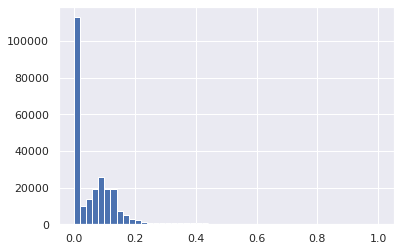

In [11]:
#LGD MODEL
# Histogram with 50 bins
plt.hist(loan_data_defaults['recovery_rate'], bins = 50)

In [12]:
from sklearn.model_selection import train_test_split
lgd_inputs_stage_1_train, lgd_inputs_stage_1_test, lgd_targets_stage_1_train, lgd_targets_stage_1_test = train_test_split(loan_data_defaults.drop(['recovery_rate','recovery_rate_0_1', 'CCF'], axis = 1), loan_data_defaults['recovery_rate_0_1'], test_size = 0.2, random_state = 42)

In [13]:
# Sanity check

print (lgd_inputs_stage_1_train.shape)
print (lgd_inputs_stage_1_test.shape)
print (lgd_targets_stage_1_train.shape)
print (lgd_targets_stage_1_test.shape)

(199023, 101)
(49756, 101)
(199023,)
(49756,)


In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler() 
scaler.fit(lgd_inputs_stage_1_train)
#fit the scaler on train, then apply same scaler to both train and test
X_train_scaled = scaler.transform(lgd_inputs_stage_1_train)
X_test_scaled = scaler.transform(lgd_inputs_stage_1_test)

In [16]:
lgd_inputs_stage_1_train.to_csv("X_train_LGD_C.csv")
lgd_inputs_stage_1_test.to_csv("X_test_LGD_C.csv")
lgd_targets_stage_1_train.to_csv("y_train_LGD_C.csv")
lgd_targets_stage_1_test.to_csv("y_test_LGD_C.csv")


AttributeError: ignored

In [17]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=lgd_inputs_stage_1_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=lgd_inputs_stage_1_test.columns)

In [19]:
X_train_scaled_df.to_csv("X_trainS_LGD_C.csv")
X_test_scaled_df.to_csv("X_testS_LGD_C.csv")